<a href="https://colab.research.google.com/github/aperfilyeva/anna_data690/blob/main/assignment_05/Assignment_5_Part_3_Jupyter_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 Part 3 Jupyter

 - Anna Perfilyeva
 - 3/4/2022

## Working with Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

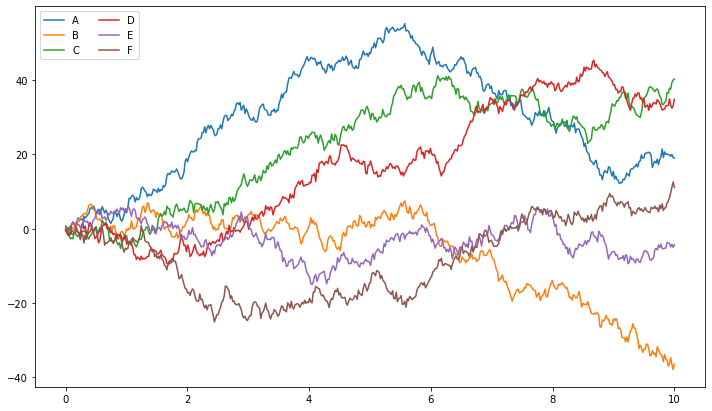

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Interacting with data

In [6]:
import requests
import pandas as pd

In [7]:
# Cryptowatch service

def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-26 00:33:06.594627')

In [9]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [10]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 01:00:00,39242.64,40330.99,39099.51,39777.78,151.636953,6.038253e+06
2022-02-26 02:00:00,39774.69,39844.04,39601.00,39759.90,34.660736,1.376529e+06
2022-02-26 03:00:00,39753.68,39755.90,39492.25,39597.57,27.672707,1.095976e+06
2022-02-26 04:00:00,39597.57,39634.65,39301.00,39428.69,27.412439,1.080352e+06
2022-02-26 05:00:00,39423.55,39488.93,39274.31,39376.99,20.257320,7.984441e+05


In [13]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41301.554852,41550.160828,41041.321834,41302.569882,91.303809,3.802822e+06
std,2279.465811,2294.620210,2271.971779,2281.662872,93.223895,3.934515e+06
min,37408.050000,37824.480000,37015.740000,37410.010000,4.595978,1.785289e+05
25%,39146.660000,39303.250000,38881.310000,39124.560000,29.446338,1.191532e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,56.021734,2.250032e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,113.919678,4.610416e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


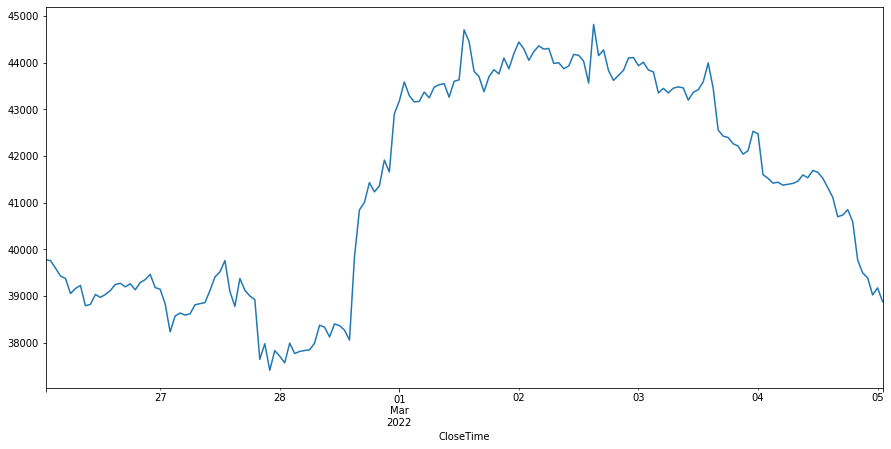

In [14]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 01:00:00,2769.53,2882.26,2767.81,2834.16,701.176875,1.978180e+06
2022-02-26 02:00:00,2834.25,2845.13,2808.07,2820.39,241.834786,6.831840e+05
2022-02-26 03:00:00,2811.40,2826.05,2800.97,2804.80,115.672493,3.257474e+05
2022-02-26 04:00:00,2807.01,2808.42,2782.48,2796.31,1025.467785,2.864796e+06
2022-02-26 05:00:00,2795.97,2823.48,2795.97,2809.71,297.174400,8.340020e+05


In [16]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,2815.643964,2835.020828,2794.284615,2815.042959,531.195336,1.496398e+06
std,119.625987,120.523703,119.810393,120.419745,420.778353,1.177057e+06
min,2593.600000,2616.830000,2558.900000,2605.000000,60.764158,1.764648e+05
25%,2732.400000,2747.980000,2713.490000,2730.500000,236.761901,6.801529e+05
50%,2810.350000,2828.510000,2792.110000,2809.710000,410.094475,1.162893e+06
75%,2923.690000,2935.710000,2906.290000,2925.000000,658.377277,1.902612e+06
max,3020.000000,3045.710000,2991.440000,3020.540000,2283.844474,6.377381e+06


## Bonus: Dynamic plots with Bokeh

 - plotting library that generates interactive plots

In [17]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [18]:
output_notebook()

In [19]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Exporting to Excel

In [20]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [21]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [25]:
eth.to_excel(writer, sheet_name='Ether')

In [26]:
writer.save()